In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

X_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/y_train.txt', delim_whitespace=True, header=None)
subject_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/subject_train.txt', delim_whitespace=True, header=None)

X_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/y_test.txt', delim_whitespace=True, header=None)
subject_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/subject_test.txt', delim_whitespace=True, header=None)

print(X_train.shape, y_train.shape, subject_train.shape)
print(X_test.shape, y_test.shape, subject_test.shape)


<ipython-input-33-694f4fbaa06c>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-33-694f4fbaa06c>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/y_train.txt', delim_whitespace=True, header=None)
<ipython-input-33-694f4fbaa06c>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/subject_train.txt', delim_whitespace=True, header=None)
<ipython-input-33-694f4fbaa06c>:8: FutureWarning: The 'delim_whitespace' keyword in pd.r

(7352, 561) (7352, 1) (7352, 1)
(2947, 561) (2947, 1) (2947, 1)


<ipython-input-33-694f4fbaa06c>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/y_test.txt', delim_whitespace=True, header=None)
<ipython-input-33-694f4fbaa06c>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/subject_test.txt', delim_whitespace=True, header=None)


In [ ]:
# Loading inertial signals for train set
body_acc_x_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/body_acc_x_train.txt', delim_whitespace=True, header=None)
body_acc_y_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/body_acc_y_train.txt', delim_whitespace=True, header=None)
body_acc_z_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/body_acc_z_train.txt', delim_whitespace=True, header=None)

body_gyro_x_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/body_gyro_x_train.txt', delim_whitespace=True, header=None)
body_gyro_y_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/body_gyro_y_train.txt', delim_whitespace=True, header=None)
body_gyro_z_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/body_gyro_z_train.txt', delim_whitespace=True, header=None)

total_acc_x_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
total_acc_y_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
total_acc_z_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/total_acc_z_train.txt', delim_whitespace=True, header=None)

# Load for the test set
body_acc_x_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/Inertial Signals/body_acc_x_test.txt', delim_whitespace=True, header=None)
body_acc_y_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/Inertial Signals/body_acc_y_test.txt', delim_whitespace=True, header=None)
body_acc_z_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/Inertial Signals/body_acc_z_test.txt', delim_whitespace=True, header=None)

body_gyro_x_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/Inertial Signals/body_gyro_x_test.txt', delim_whitespace=True, header=None)
body_gyro_y_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/Inertial Signals/body_gyro_y_test.txt', delim_whitespace=True, header=None)
body_gyro_z_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/Inertial Signals/body_gyro_z_test.txt', delim_whitespace=True, header=None)

total_acc_x_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/Inertial Signals/total_acc_x_test.txt', delim_whitespace=True, header=None)
total_acc_y_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/Inertial Signals/total_acc_y_test.txt', delim_whitespace=True, header=None)
total_acc_z_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/Inertial Signals/total_acc_z_test.txt', delim_whitespace=True, header=None)

# inertial signals
print(body_acc_x_train.shape, body_acc_y_train.shape, body_acc_z_train.shape)


<ipython-input-34-c3817e76cd1c>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  body_acc_x_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/body_acc_x_train.txt', delim_whitespace=True, header=None)
<ipython-input-34-c3817e76cd1c>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  body_acc_y_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/body_acc_y_train.txt', delim_whitespace=True, header=None)
<ipython-input-34-c3817e76cd1c>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  body_acc_z_train = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/train/Inertial Signals/body_acc_z_train.txt', delim_whitespace=True, header=N

(7352, 128) (7352, 128) (7352, 128)


<ipython-input-34-c3817e76cd1c>:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z_test = pd.read_csv('/content/drive/MyDrive/Human-Activity-Rec/test/Inertial Signals/total_acc_z_test.txt', delim_whitespace=True, header=None)


In [ ]:
X_train_full = pd.concat([body_acc_x_train, body_acc_y_train, body_acc_z_train,
                         body_gyro_x_train, body_gyro_y_train, body_gyro_z_train,
                         total_acc_x_train, total_acc_y_train, total_acc_z_train], axis=1)

X_test_full = pd.concat([body_acc_x_test, body_acc_y_test, body_acc_z_test,
                         body_gyro_x_test, body_gyro_y_test, body_gyro_z_test,
                         total_acc_x_test, total_acc_y_test, total_acc_z_test], axis=1)

#feature matrix shape
print(X_train_full.shape, X_test_full.shape)


(7352, 1152) (2947, 1152)


In [ ]:
# Add the subject information
X_train_full['subject'] = subject_train
X_test_full['subject'] = subject_test

train_data = pd.concat([X_train_full, y_train], axis=1)
test_data = pd.concat([X_test_full, y_test], axis=1)

print(train_data.shape, test_data.shape)


(7352, 1154) (2947, 1154)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and labels (y) for train and test sets
#X_train = train_data.drop('Activity', axis=1)
#y_train = train_data['Activity']
#X_test = test_data.drop('Activity', axis=1)
#y_test = test_data['Activity']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)


(7352, 561) (2947, 561)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA - keeping 2 components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='magma', s=30)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Human Activity Recognition')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest model: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy of Random Forest model: 92.67%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy of KNN model: {accuracy_knn * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of KNN model: 88.02%


In [ ]:
print(f"Number of features in the dataset: {X_train.shape[1]}")

Number of features in the dataset: 561


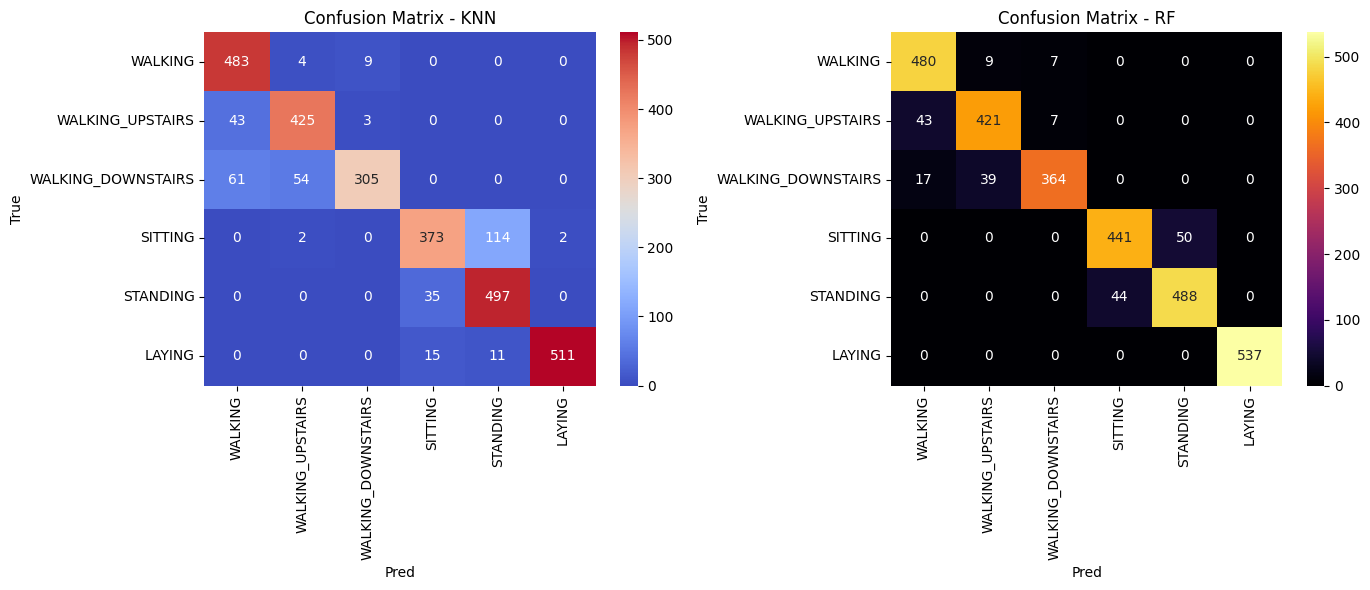

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=activity_labels.values(),
            yticklabels=activity_labels.values(), ax=axes[0])
axes[0].set_xlabel('Pred')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix - KNN')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='inferno',
            xticklabels=activity_labels.values(),
            yticklabels=activity_labels.values(), ax=axes[1])
axes[1].set_xlabel('Pred')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix - RF')

plt.subplots_adjust(wspace=0.3)

plt.tight_layout()
plt.show()
